In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import auc, average_precision_score
from pylab import rcParams
import seaborn as sns
from functools import reduce
import operator

In [2]:
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
rcParams['font.size'] = 15

In [3]:
EXPERIMENTS = [
    'L13UTR_vs_P_Pseudo',
    'L13UTR_vs_mRNA',
    'L13UTR_P_Pseudo_vs_shuffled',
    'L13UTR_mRNA_vs_shuffled',
    'P_Pseudo_vs_shuffled',
    'mRNA_vs_shuffled',
]

# Physical and chemical propertires based model

## ROC AUC

In [4]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/AUC__L1_vs_Pseudogenes__Phys-Chem-Struct.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/AUC__L1_vs_KnownGene__Phys-Chem-Struct.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/AUC__L1_Pseudogenes_vs_Shuffle__Phys-Chem-Struct.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/AUC__L1_KnownGene_vs_Shuffle__Phys-Chem-Struct.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/AUC__Pseudogenes_vs_Shuffle__Phys-Chem-Struct.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/AUC__KnownGene_vs_Shuffle__Phys-Chem-Struct.csv')

# Add more experiments here

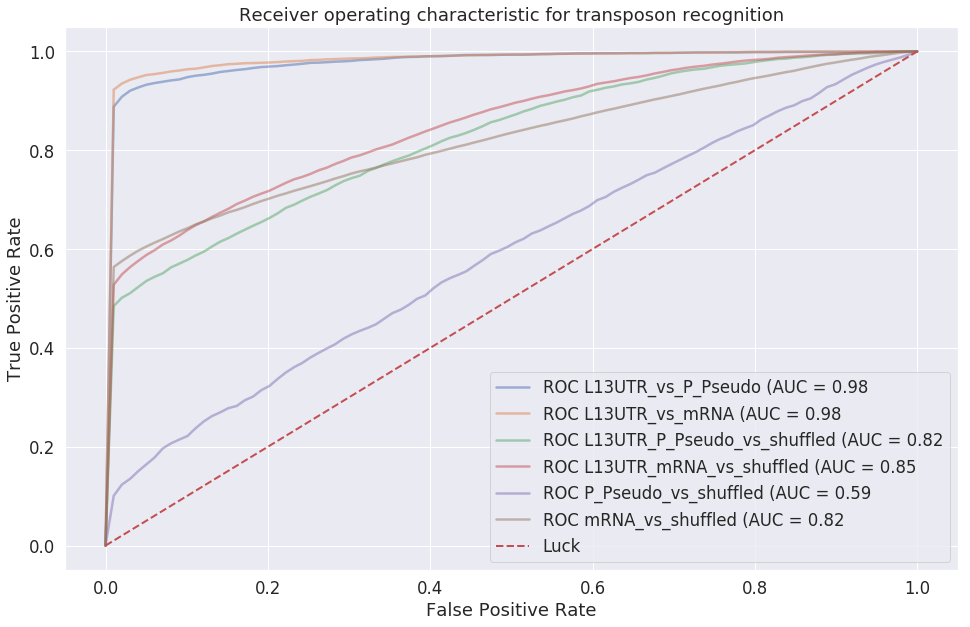

In [5]:
for name, df in zip(EXPERIMENTS,[
    L13UTR_vs_Processed_Pseudogenes,
    L13UTR_vs_mRNA,
    L13UTR_Processed_Pseudogenes_vs_Shuffled,
    L13UTR_mRNA_vs_Shuffled,
    Processed_Pseudogenes_vs_Shuffled,
    mRNA_vs_Shuffled,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=1.0
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [6]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/Precision-Recall__L1_vs_Pseudogenes__Phys-Chem-Struct.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/Precision-Recall__L1_vs_KnownGene__Phys-Chem-Struct.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__L1_Pseudogenes_vs_Shuffle__Phys-Chem-Struct.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__L1_KnownGene_vs_Shuffle__Phys-Chem-Struct.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__Pseudogenes_vs_Shuffle__Phys-Chem-Struct.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__KnownGene_vs_Shuffle__Phys-Chem-Struct.csv')
# Add more experiments here

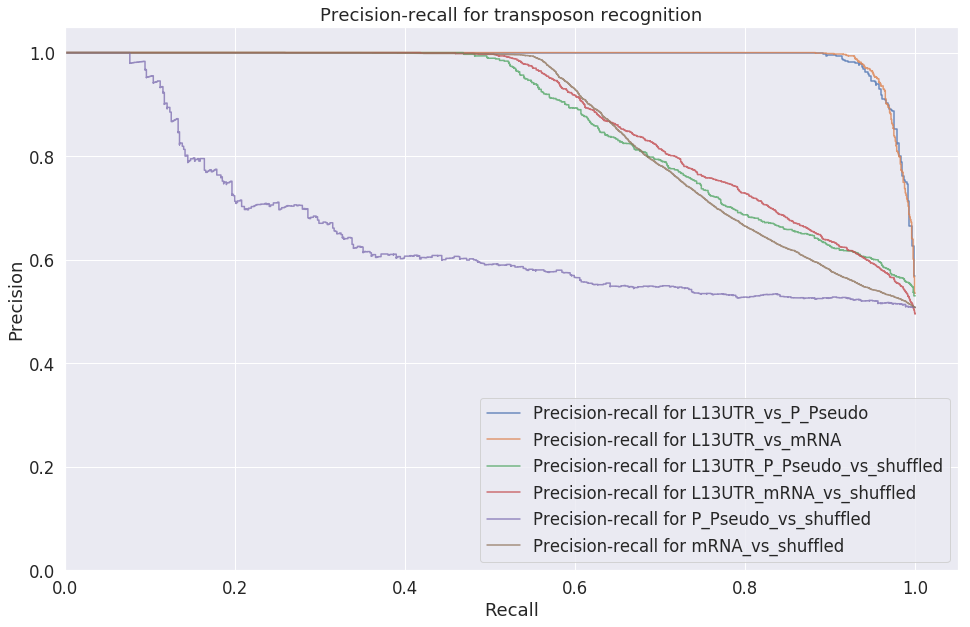

In [7]:
for name, df in zip(EXPERIMENTS,[
    L13UTR_vs_Processed_Pseudogenes,
    L13UTR_vs_mRNA,
    L13UTR_Processed_Pseudogenes_vs_Shuffled,
    L13UTR_mRNA_vs_Shuffled,
    Processed_Pseudogenes_vs_Shuffled,
    mRNA_vs_Shuffled,
        # Add more experiments here,
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.8,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [8]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/Feature_importance__L1_vs_Pseudogenes__Phys-Chem-Struct.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/Feature_importance__L1_vs_KnownGene__Phys-Chem-Struct.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__L1_Pseudogenes_vs_Shuffle__Phys-Chem-Struct.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__L1_KnownGene_vs_Shuffle__Phys-Chem-Struct.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__Pseudogenes_vs_Shuffle__Phys-Chem-Struct.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__KnownGene_vs_Shuffle__Phys-Chem-Struct.csv')
# Add more experiments here

In [9]:
top_features = pd.unique(pd.concat([
    L13UTR_vs_Processed_Pseudogenes.iloc[:10],
    L13UTR_vs_mRNA.iloc[:10],
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10],
    L13UTR_mRNA_vs_Shuffled.iloc[:10],
    Processed_Pseudogenes_vs_Shuffled.iloc[:10],
    mRNA_vs_Shuffled.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    L13UTR_vs_Processed_Pseudogenes[L13UTR_vs_Processed_Pseudogenes.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_vs_mRNA[L13UTR_vs_mRNA.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_Processed_Pseudogenes_vs_Shuffled[L13UTR_Processed_Pseudogenes_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_mRNA_vs_Shuffled[L13UTR_mRNA_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    Processed_Pseudogenes_vs_Shuffled[Processed_Pseudogenes_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    mRNA_vs_Shuffled[mRNA_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1).fillna(0)
to_plot_df.columns=EXPERIMENTS
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



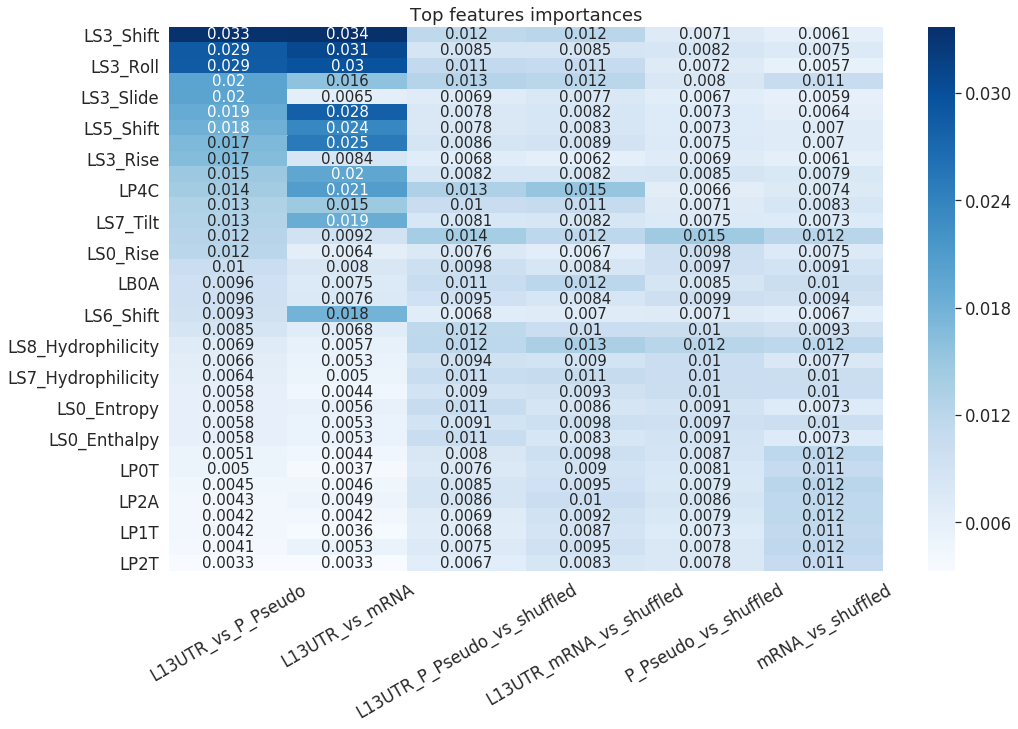

In [10]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='Blues');
ax.set_title('Top features importances');
plt.xticks(rotation=30);

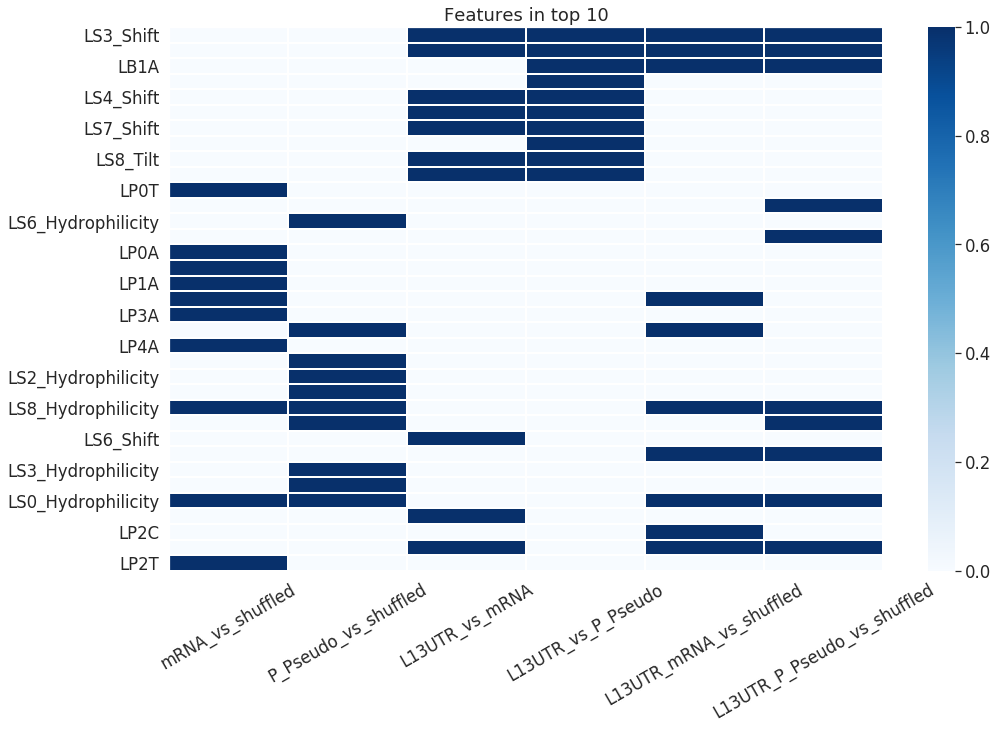

In [11]:
all_features = to_plot_df.index
top_10_experiment_features = dict(zip(EXPERIMENTS, [ 
    L13UTR_vs_Processed_Pseudogenes.iloc[:10].Feature_name.tolist(), 
    L13UTR_vs_mRNA.iloc[:10].Feature_name.tolist(), 
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    L13UTR_mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(),
]))
lines = []
for feature in all_features:
    lines.append({key: feature in top_10_experiment_features[key] and 1 or 0 for key in top_10_experiment_features})

binary_hm_df = pd.DataFrame(lines)
binary_hm_df.index = all_features
binary_hm_df = binary_hm_df[list(reversed(binary_hm_df.columns))]
binary_hm_df = binary_hm_df.sort_values(EXPERIMENTS[0], ascending=False)
ax = plt.axes()
axh = sns.heatmap(binary_hm_df, cmap='Blues', linewidths=1)
for _, spine in axh.spines.items():
    spine.set_visible(True)
ax.set_title('Features in top 10')
plt.xticks(rotation=30);

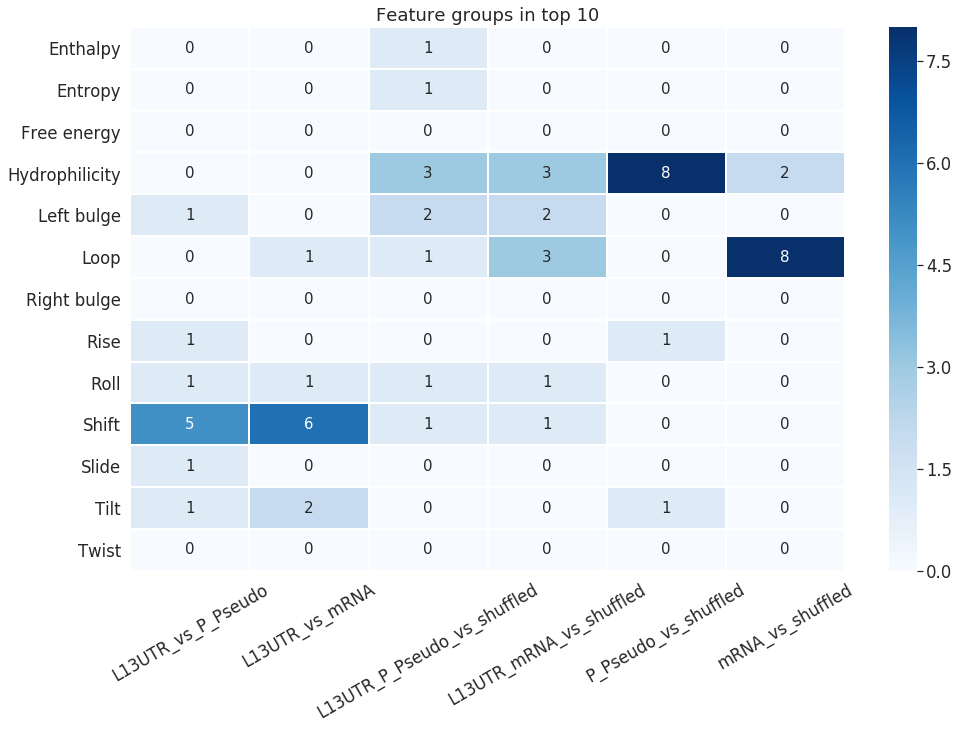

In [12]:
PROPERTIES = {
    'Shift': 'Shift',
    'Slide': 'Slide',
    'Rise': 'Rise',
    'Tilt': 'Tilt',
    'Roll': 'Roll',
    'Twist': 'Twist',
    'Hydrophilicity': 'Hydrophilicity',
    'Enthalpy': 'Enthalpy',
    'Entropy': 'Entropy',
    'Free energy': 'Free energy',
    'Loop': 'LP',
    'Left bulge': 'LB',
    'Right bulge': 'RB',
}

groups = list(PROPERTIES.keys())

lines = []
for experiment in EXPERIMENTS:
    lines.append({
        alias: sum(
            map(lambda x: PROPERTIES[alias] in x, top_10_experiment_features[experiment])
        ) for alias in PROPERTIES
    })
           
hm_df = pd.DataFrame(lines).T
hm_df.columns = EXPERIMENTS
ax = plt.axes()
sns.heatmap(hm_df, cmap='Blues', linewidths=1, annot=True)
ax.set_title('Feature groups in top 10')
plt.xticks(rotation=30);

In [13]:
top_10_experiment_features = dict(zip(EXPERIMENTS, [ 
    L13UTR_vs_Processed_Pseudogenes.iloc[:10].Feature_name.tolist(), 
    L13UTR_vs_mRNA.iloc[:10].Feature_name.tolist(), 
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    L13UTR_mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(),
]))

LS = []
LP = []
LB = []
RB = []
for i in range(9,-1,-1):
    LS.append('LS'+str(i))

for i in range(5):
    LP.append('LP'+str(i))

for i in range(3):
    LB.append('LB'+str(i))
    RB.append('RB'+str(i))

X = LS+LP+LB+RB
lines = []  
for experiment in EXPERIMENTS:
    lines.append({pos: sum(map(lambda x: pos in x or 0, top_10_experiment_features[experiment])) for pos in X})

lines_df = pd.DataFrame(lines)
lines_df.index = EXPERIMENTS

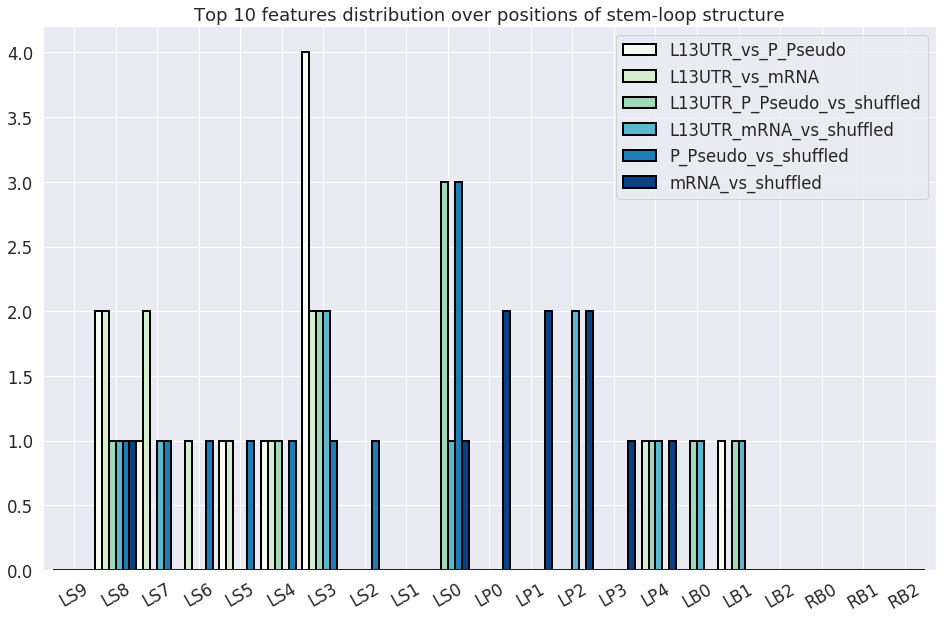

In [14]:
experiment_graph = lines_df[X].T.plot.bar(width=1, edgecolor='black', cmap='GnBu', lw=2)
experiment_graph.set_title('Top 10 features distribution over positions of stem-loop structure')
plt.xticks(rotation=30);

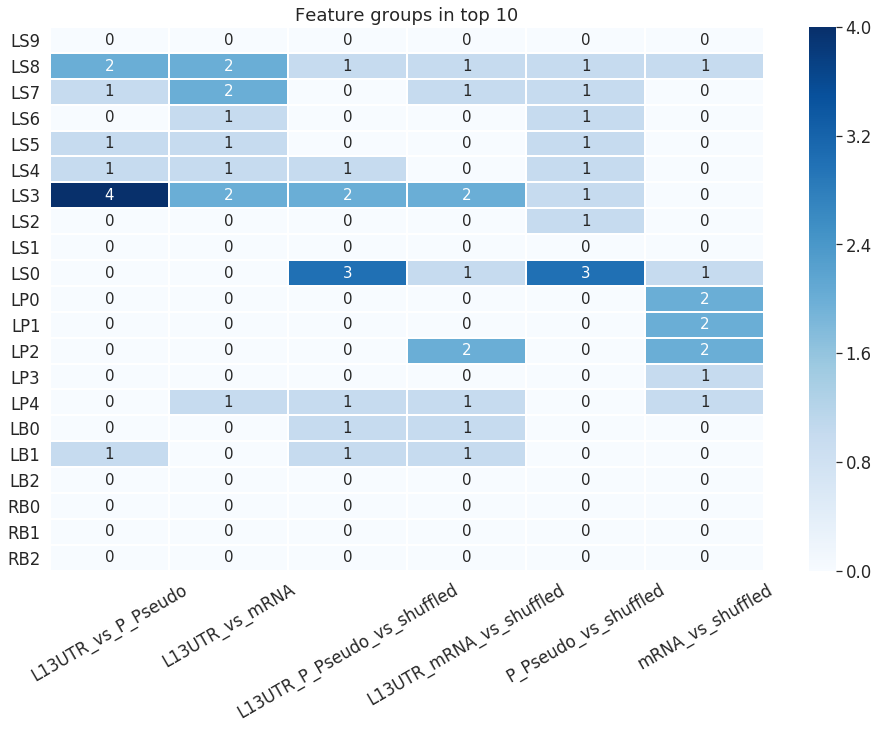

In [15]:
ax = plt.axes()
sns.heatmap(lines_df[X].T, cmap='Blues', linewidths=1, annot=True)
ax.set_title('Feature groups in top 10')
plt.xticks(rotation=30);
plt.yticks(rotation=0);

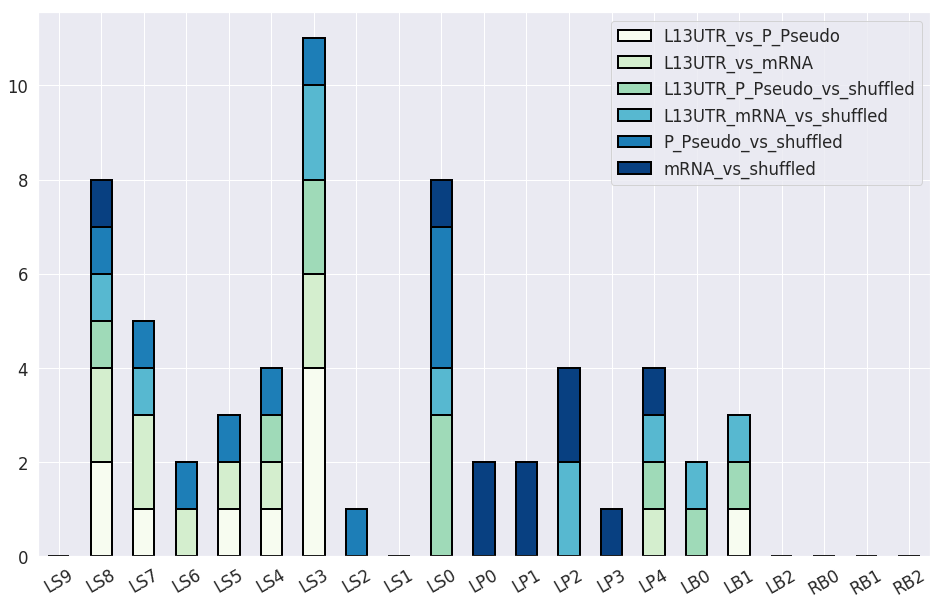

In [16]:
lines_df[X].T.plot(kind='bar', stacked=True, cmap='GnBu', edgecolor='black', lw=2)
plt.xticks(rotation=30);

# Stem-loop statistical model

## ROC AUC

In [17]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/AUC__L1_vs_Pseudogenes__Stem-Loop_Stats.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/AUC__L1_vs_KnownGene__Stem-Loop_Stats.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/AUC__L1_Pseudogenes_vs_Shuffle__Stem-Loop_Stats.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/AUC__L1_KnownGene_vs_Shuffle__Stem-Loop_Stats.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/AUC__Pseudogenes_vs_Shuffle__Stem-Loop_Stats.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/AUC__KnownGene_vs_Shuffle__Stem-Loop_Stats.csv')
# Add more experiments here

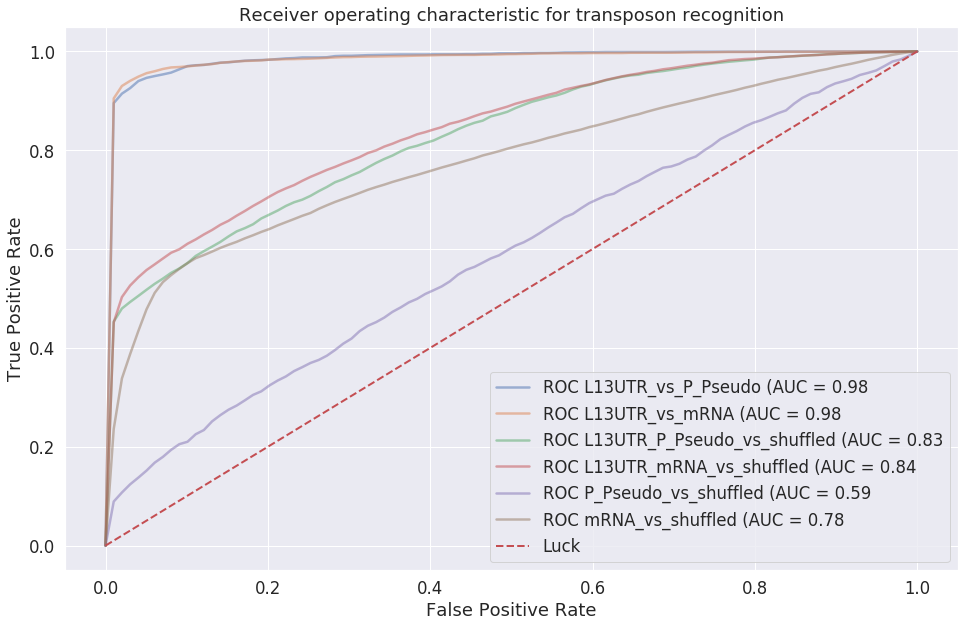

In [18]:
for name, df in zip(EXPERIMENTS,[
    L13UTR_vs_Processed_Pseudogenes,
    L13UTR_vs_mRNA,
    L13UTR_Processed_Pseudogenes_vs_Shuffled,
    L13UTR_mRNA_vs_Shuffled,
    Processed_Pseudogenes_vs_Shuffled,
    mRNA_vs_Shuffled,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=1.0
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [19]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/Precision-Recall__L1_vs_Pseudogenes__Stem-Loop_Stats.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/Precision-Recall__L1_vs_KnownGene__Stem-Loop_Stats.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__L1_Pseudogenes_vs_Shuffle__Stem-Loop_Stats.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__L1_KnownGene_vs_Shuffle__Stem-Loop_Stats.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__Pseudogenes_vs_Shuffle__Stem-Loop_Stats.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__KnownGene_vs_Shuffle__Stem-Loop_Stats.csv')
# Add more experiments here

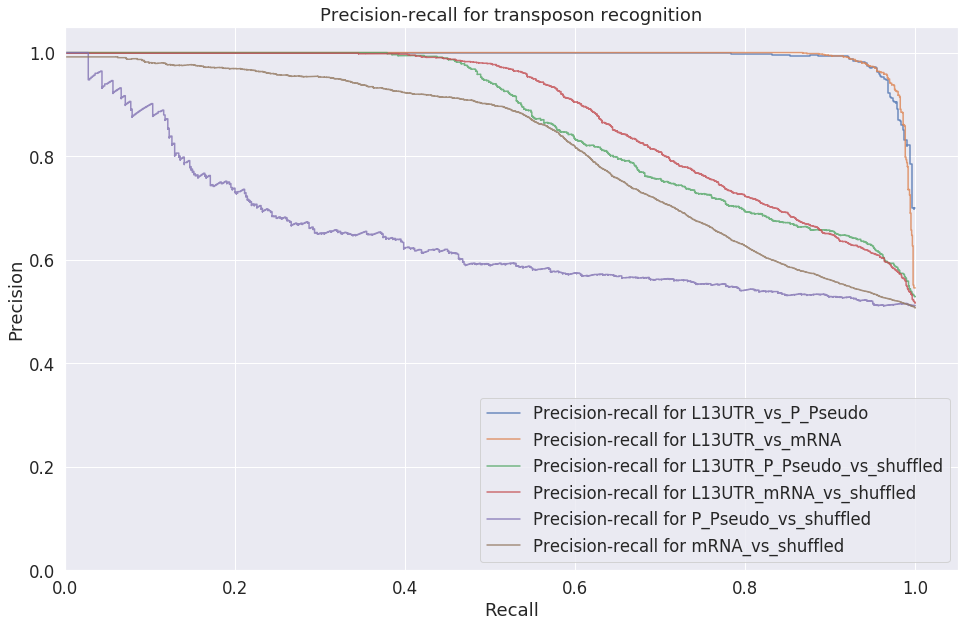

In [20]:
for name, df in zip(EXPERIMENTS,[
    L13UTR_vs_Processed_Pseudogenes,
    L13UTR_vs_mRNA,
    L13UTR_Processed_Pseudogenes_vs_Shuffled,
    L13UTR_mRNA_vs_Shuffled,
    Processed_Pseudogenes_vs_Shuffled,
    mRNA_vs_Shuffled,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.8,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [21]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/Feature_importance__L1_vs_Pseudogenes__Stem-Loop_Stats.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/Feature_importance__L1_vs_KnownGene__Stem-Loop_Stats.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__L1_Pseudogenes_vs_Shuffle__Stem-Loop_Stats.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__L1_KnownGene_vs_Shuffle__Stem-Loop_Stats.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__Pseudogenes_vs_Shuffle__Stem-Loop_Stats.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__KnownGene_vs_Shuffle__Stem-Loop_Stats.csv')
# Add more experiments here

In [22]:
top_features = pd.unique(pd.concat([
    L13UTR_vs_Processed_Pseudogenes.iloc[:10],
    L13UTR_vs_mRNA.iloc[:10],
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10],
    L13UTR_mRNA_vs_Shuffled.iloc[:10],
    Processed_Pseudogenes_vs_Shuffled.iloc[:10],
    mRNA_vs_Shuffled.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    L13UTR_vs_Processed_Pseudogenes[L13UTR_vs_Processed_Pseudogenes.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_vs_mRNA[L13UTR_vs_mRNA.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_Processed_Pseudogenes_vs_Shuffled[L13UTR_Processed_Pseudogenes_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_mRNA_vs_Shuffled[L13UTR_mRNA_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    Processed_Pseudogenes_vs_Shuffled[Processed_Pseudogenes_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    mRNA_vs_Shuffled[mRNA_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1).fillna(0)
to_plot_df.columns=EXPERIMENTS
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



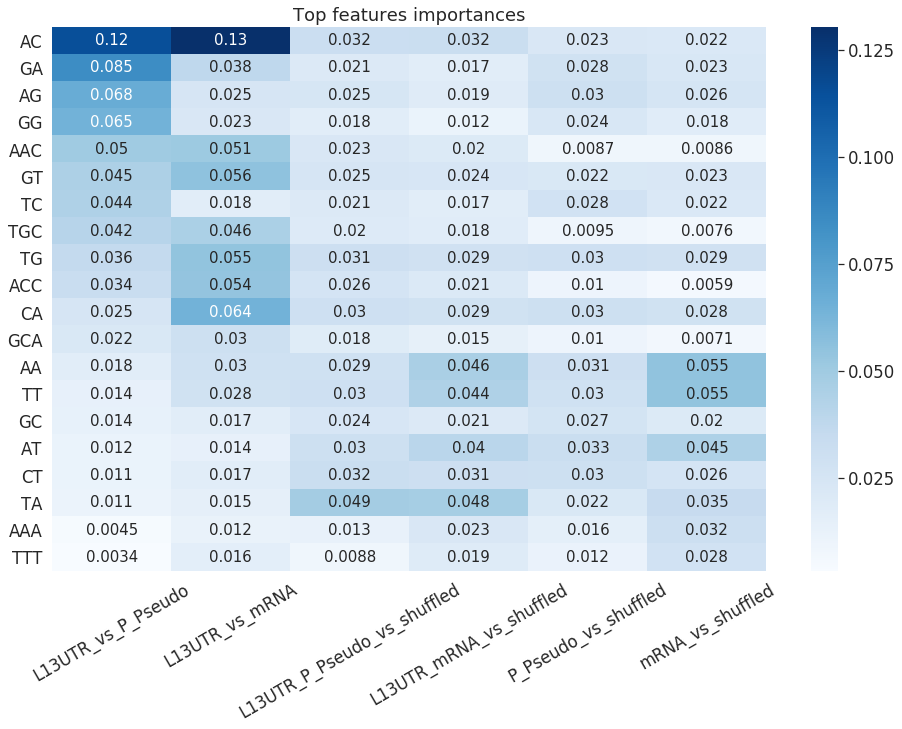

In [23]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='Blues');
ax.set_title('Top features importances');
plt.xticks(rotation=30)
plt.yticks(rotation=0);

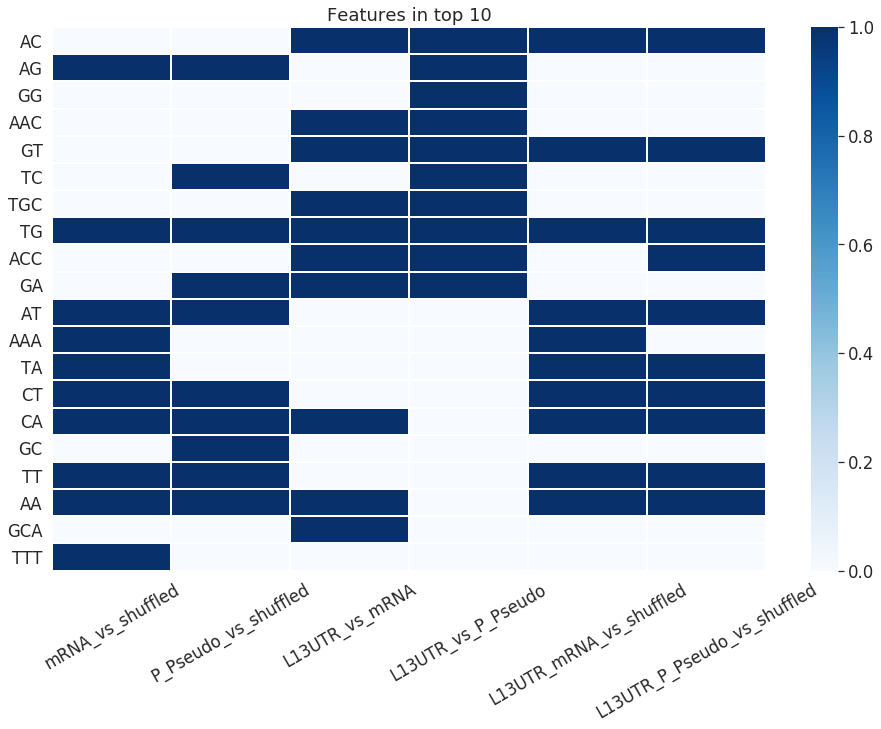

In [24]:
all_features = to_plot_df.index
top_10_experiment_features = dict(zip(EXPERIMENTS, [ 
    L13UTR_vs_Processed_Pseudogenes.iloc[:10].Feature_name.tolist(), 
    L13UTR_vs_mRNA.iloc[:10].Feature_name.tolist(), 
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    L13UTR_mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(),
]))
lines = []
for feature in all_features:
    lines.append({key: feature in top_10_experiment_features[key] and 1 or 0 for key in top_10_experiment_features})

binary_hm_df = pd.DataFrame(lines)
binary_hm_df.index = all_features
binary_hm_df = binary_hm_df[list(reversed(binary_hm_df.columns))]
binary_hm_df = binary_hm_df.sort_values(EXPERIMENTS[0], ascending=False)
ax = plt.axes()
sns.heatmap(binary_hm_df, cmap='Blues', linewidths=1)
ax.set_title('Features in top 10')
plt.xticks(rotation=30);
plt.yticks(rotation=0);

# 50 bp statistical model

## ROC AUC

In [25]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/AUC__L1_vs_Pseudogenes__50b.p._Stats.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/AUC__L1_vs_KnownGene__50b.p._Stats.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/AUC__L1_Pseudogenes_vs_Shuffle__50b.p._Stats.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/AUC__L1_KnownGene_vs_Shuffle__50b.p._Stats.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/AUC__Pseudogenes_vs_Shuffle__50b.p._Stats.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/AUC__KnownGene_vs_Shuffle__50b.p._Stats.csv')
# Add more experiments here

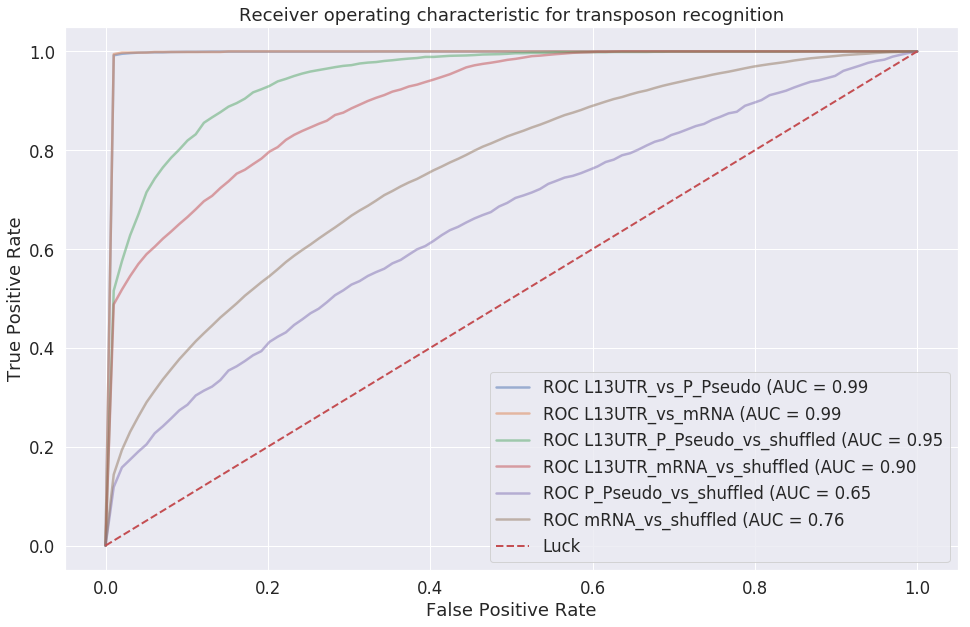

In [26]:
for name, df in zip(EXPERIMENTS,[
    L13UTR_vs_Processed_Pseudogenes,
    L13UTR_vs_mRNA,
    L13UTR_Processed_Pseudogenes_vs_Shuffled,
    L13UTR_mRNA_vs_Shuffled,
    Processed_Pseudogenes_vs_Shuffled,
    mRNA_vs_Shuffled,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=1.0
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [27]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/Precision-Recall__L1_vs_Pseudogenes__50b.p._Stats.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/Precision-Recall__L1_vs_KnownGene__50b.p._Stats.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__L1_Pseudogenes_vs_Shuffle__50b.p._Stats.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__L1_KnownGene_vs_Shuffle__50b.p._Stats.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__Pseudogenes_vs_Shuffle__50b.p._Stats.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/Precision-Recall__KnownGene_vs_Shuffle__50b.p._Stats.csv')
# Add more experiments here

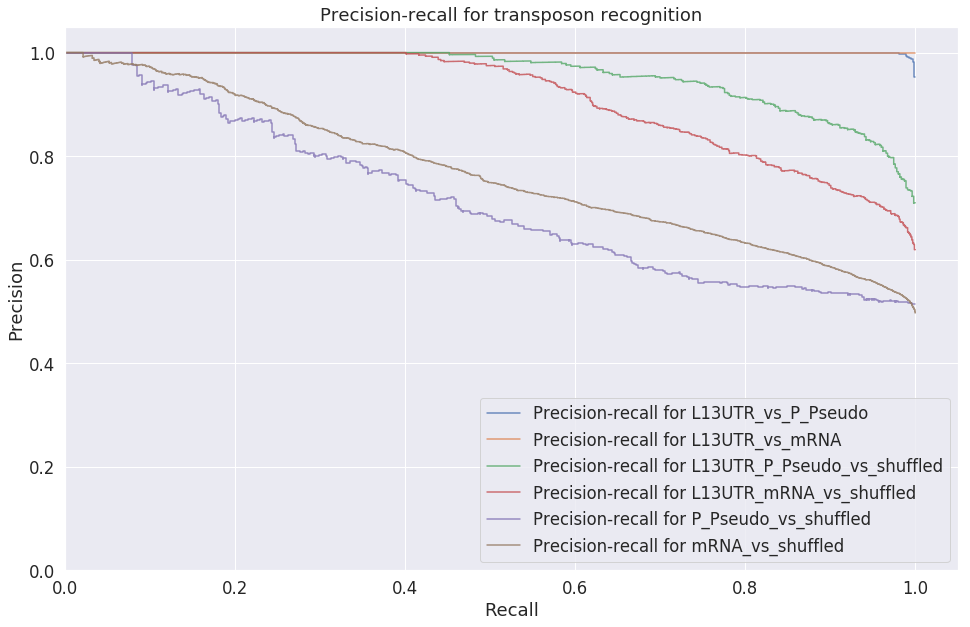

In [28]:
for name, df in zip(EXPERIMENTS,[
    L13UTR_vs_Processed_Pseudogenes,
    L13UTR_vs_mRNA,
    L13UTR_Processed_Pseudogenes_vs_Shuffled,
    L13UTR_mRNA_vs_Shuffled,
    Processed_Pseudogenes_vs_Shuffled,
    mRNA_vs_Shuffled,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.8,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [29]:
L13UTR_vs_Processed_Pseudogenes = pd.read_csv('L1Extra/Feature_importance__L1_vs_Pseudogenes__50b.p._Stats.csv')
L13UTR_vs_mRNA = pd.read_csv('L1Extra/Feature_importance__L1_vs_KnownGene__50b.p._Stats.csv')
L13UTR_Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__L1_Pseudogenes_vs_Shuffle__50b.p._Stats.csv')
L13UTR_mRNA_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__L1_KnownGene_vs_Shuffle__50b.p._Stats.csv')
Processed_Pseudogenes_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__Pseudogenes_vs_Shuffle__50b.p._Stats.csv')
mRNA_vs_Shuffled = pd.read_csv('L1Extra/Feature_importance__KnownGene_vs_Shuffle__50b.p._Stats.csv')
# Add more experiments here

In [30]:
top_features = pd.unique(pd.concat([
    L13UTR_vs_Processed_Pseudogenes.iloc[:10],
    L13UTR_vs_mRNA.iloc[:10],
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10],
    L13UTR_mRNA_vs_Shuffled.iloc[:10],
    Processed_Pseudogenes_vs_Shuffled.iloc[:10],
    mRNA_vs_Shuffled.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    L13UTR_vs_Processed_Pseudogenes[L13UTR_vs_Processed_Pseudogenes.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_vs_mRNA[L13UTR_vs_mRNA.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_Processed_Pseudogenes_vs_Shuffled[L13UTR_Processed_Pseudogenes_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    L13UTR_mRNA_vs_Shuffled[L13UTR_mRNA_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    Processed_Pseudogenes_vs_Shuffled[Processed_Pseudogenes_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    mRNA_vs_Shuffled[mRNA_vs_Shuffled.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1).fillna(0)
to_plot_df.columns=EXPERIMENTS
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



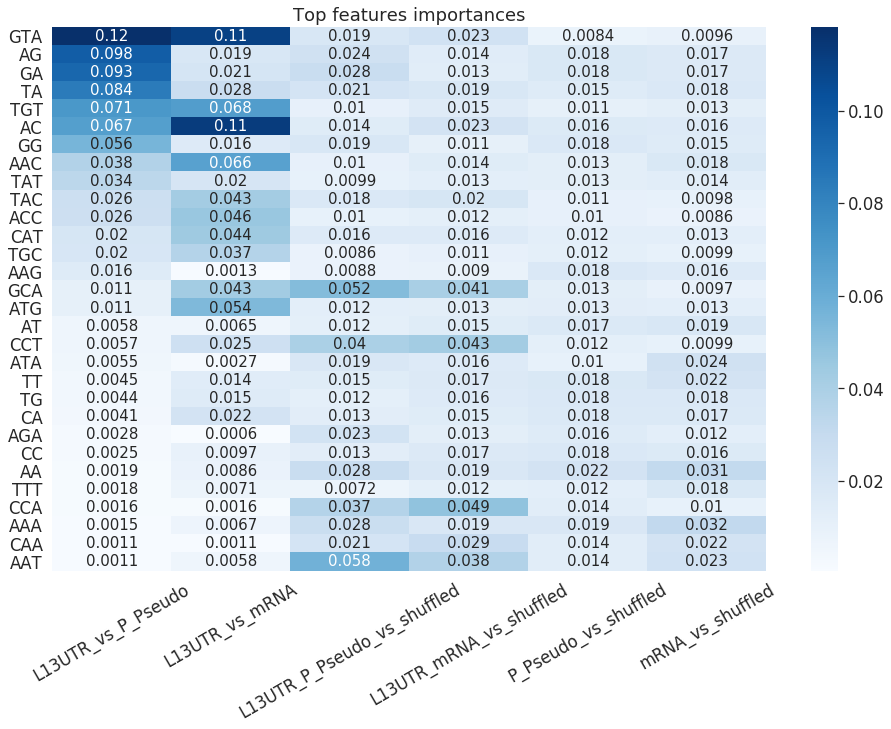

In [31]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='Blues');
ax.set_title('Top features importances');
plt.xticks(rotation=30);

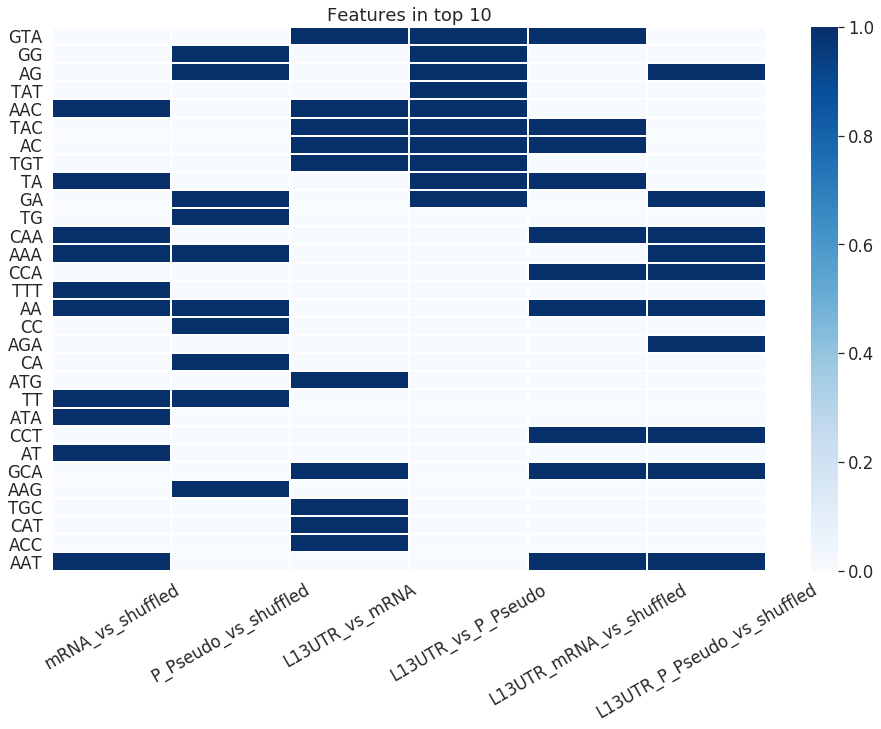

In [32]:
all_features = to_plot_df.index
top_10_experiment_features = dict(zip(EXPERIMENTS, [ 
    L13UTR_vs_Processed_Pseudogenes.iloc[:10].Feature_name.tolist(), 
    L13UTR_vs_mRNA.iloc[:10].Feature_name.tolist(), 
    L13UTR_Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    L13UTR_mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    Processed_Pseudogenes_vs_Shuffled.iloc[:10].Feature_name.tolist(), 
    mRNA_vs_Shuffled.iloc[:10].Feature_name.tolist(),
]))
lines = []
for feature in all_features:
    lines.append({key: feature in top_10_experiment_features[key] and 1 or 0 for key in top_10_experiment_features})

binary_hm_df = pd.DataFrame(lines)
binary_hm_df.index = all_features
binary_hm_df = binary_hm_df[list(reversed(binary_hm_df.columns))]
binary_hm_df = binary_hm_df.sort_values(EXPERIMENTS[0], ascending=False)
ax = plt.axes()
sns.heatmap(binary_hm_df, cmap='Blues', linewidths=1)
ax.set_title('Features in top 10')
plt.xticks(rotation=30);

# Processed pseudogenes and mRNA recognition by L1 vs shuffled trained model

In [33]:
recognition_accuracy = pd.read_csv(
    'L1Extra/mRNA_pseudogens_recognition.txt',
    sep=',',
    header=None,
)
recognition_accuracy.columns = ['Experiment type', 'mRNA hit rate', 'Processed pseudogenes hit rate']
recognition_accuracy = recognition_accuracy.set_index('Experiment type')

In [34]:
recognition_accuracy

,mRNA hit rate,Processed pseudogenes hit rate
Experiment type,,
50b.p._Stats,0.720743,0.498168
Phys-Chem-Struct,0.051974,0.026741
Sequence_based,0.093782,0.107296


Text(0, 0.5, '% recognized as transposons')

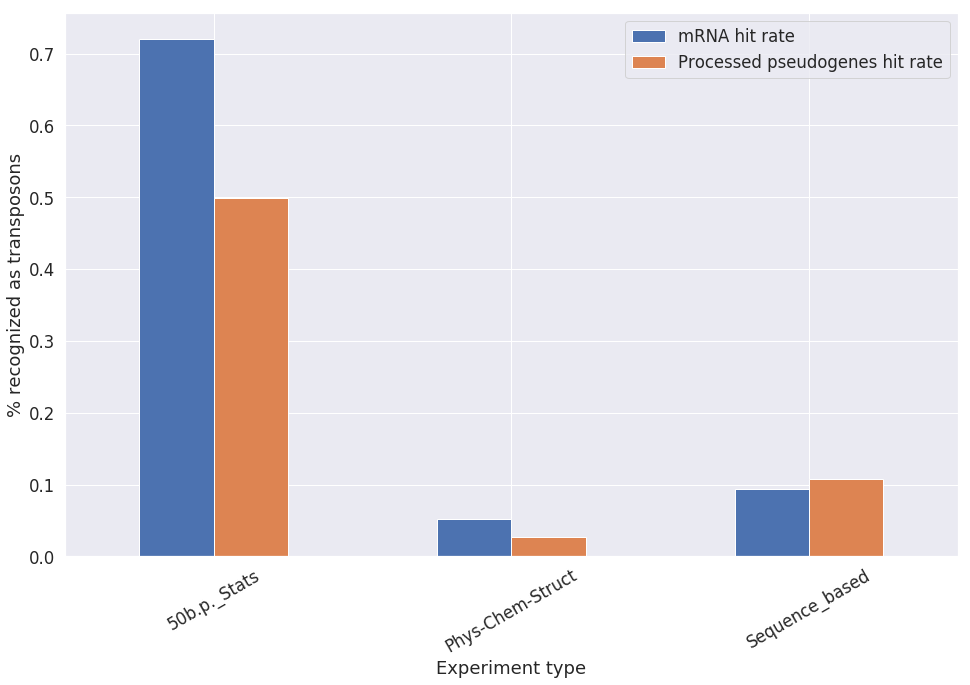

In [35]:
recognition_accuracy.plot(kind='bar')
plt.xticks(rotation=30)
plt.ylabel('% recognized as transposons')